# Image Search from Hindi, Spanish, and French Text Data

SentenceTransformers provides models that allow to embed images and text into the same vector space. This allows to find similar images as well as to implement image search.




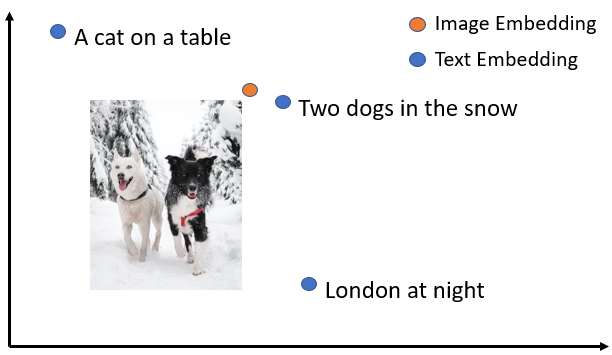

we use the OpenAI CLIP Model, which was trained on a large set of images and image alt texts.

https://github.com/openai/CLIP

we use the Unsplash Dataset Lite, which contains about 25k images.

https://unsplash.com/data

https://github.com/unsplash/datasets

http://sbert.net/datasets/

https://public.ukp.informatik.tu-darmstadt.de/reimers/sentence-transformers/datasets/unsplash-25k-photos.zip

The original CLIP Model only works for English, hence, we used Multilingual Knowlegde Distillation to make this model work with 50+ languages.

https://arxiv.org/abs/2004.09813

#### Pretrained Models
https://www.sbert.net/docs/pretrained_models.html

In [1]:
%pip install sentence_transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 5.0 MB/s 
     |████████████████████████████████| 5.8 MB 63.4 MB/s 
     |████████████████████████████████| 1.3 MB 50.7 MB/s 
     |████████████████████████████████| 182 kB 79.7 MB/s 
     |████████████████████████████████| 7.6 MB 51.1 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=69a96d6dc943a024bbecd35a80ae28c9b0abfca8b7bf0b0994345cc58a6e06ea
  Stored in directory: /root/.cache/pip/wheels/5e/6f/8c/d88aec621f3f542d26fac0342bef5e693335d125f4e54aeffe
Successfully built sentence-transformers


In [2]:
from sentence_transformers import SentenceTransformer, util
from PIL import Image
import matplotlib.pyplot as plt
import glob
import torch
import os

In [3]:
!wget https://public.ukp.informatik.tu-darmstadt.de/reimers/sentence-transformers/datasets/unsplash-25k-photos.zip

--2022-12-26 14:36:33--  https://public.ukp.informatik.tu-darmstadt.de/reimers/sentence-transformers/datasets/unsplash-25k-photos.zip
Resolving public.ukp.informatik.tu-darmstadt.de (public.ukp.informatik.tu-darmstadt.de)... 130.83.167.186
Connecting to public.ukp.informatik.tu-darmstadt.de (public.ukp.informatik.tu-darmstadt.de)|130.83.167.186|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1922426838 (1.8G) [application/zip]
Saving to: ‘unsplash-25k-photos.zip’

unsplash-25k-photos 100%[===================>]   1.79G  90.0MB/s    in 14s     

2022-12-26 14:36:48 (131 MB/s) - ‘unsplash-25k-photos.zip’ saved [1922426838/1922426838]



In [4]:
!unzip 'unsplash-25k-photos.zip' -d 'photos'

Streaming output truncated to the last 5000 lines.
  inflating: photos/ErnD0oSB9OE.jpg  
  inflating: photos/CLMlVwtPsI4.jpg  
  inflating: photos/7by0hnrUBP8.jpg  
  inflating: photos/XWARm1Wgg4U.jpg  
  inflating: photos/m_x26CPIjic.jpg  
  inflating: photos/Or9vxPAGtXw.jpg  
  inflating: photos/asr62h5w66w.jpg  
  inflating: photos/oPubZ53L5OE.jpg  
  inflating: photos/AENmGl9JVgs.jpg  
  inflating: photos/kR1Aer8c_WI.jpg  
  inflating: photos/YCniL3n_B7Q.jpg  
  inflating: photos/pg5CVv0FEBU.jpg  
  inflating: photos/jynDaAkI0H8.jpg  
  inflating: photos/QP64OlGcfcQ.jpg  
  inflating: photos/a_nu2fRoqwI.jpg  
  inflating: photos/HeerZLfH4h8.jpg  
  inflating: photos/7TGVEgcTKlY.jpg  
  inflating: photos/fN2pzLWtG6A.jpg  
  inflating: photos/lpxXl5Ssung.jpg  
  inflating: photos/yan5Aj6crIU.jpg  
  inflating: photos/9Phn7Dwz2PM.jpg  
  inflating: photos/9TRaDtl7Z5U.jpg  
  inflating: photos/QeZuoNqtj9I.jpg  
  inflating: photos/lLUbQBbf6Bc.jpg  
  inflating: photos/rmFs3k34JLI.jpg  

In [6]:
img_names = list(glob.glob('photos/*.jpg'))[:2500]
print(len(img_names))

2500


In [7]:
img_names[0]

'photos/xjUtcDvzDPk.jpg'

In [8]:
img_model = SentenceTransformer('clip-ViT-B-32')

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.03k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/525k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/316 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/605M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/389 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/604 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/961k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.88k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

In [9]:
img_embed = img_model.encode([Image.open(img) for img in img_names], batch_size=32, convert_to_tensor=True, show_progress_bar=True)

Batches:   0%|          | 0/79 [00:00<?, ?it/s]

In [10]:
model = SentenceTransformer('clip-ViT-B-32-multilingual-v1')

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/115 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.57M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/5.63k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/572 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/539M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/371 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/996k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/341 [00:00<?, ?B/s]

In [11]:
img_folder = '/photos'

In [12]:
def search(query, top_k=3):
  query_embed = model.encode([query], convert_to_tensor=True)

  hits = util.semantic_search(query_embed, img_embed, top_k=top_k)[0]

  # print(hits)

  print('Query: ', query)
  for hit in hits:
    img_path = img_names[hit['corpus_id']]
    print(img_path)

    im = Image.open(img_path)
    plt.figure()
    plt.imshow(im)
    plt.show()

Query:  Palme
photos/b0J8OosDzrY.jpg


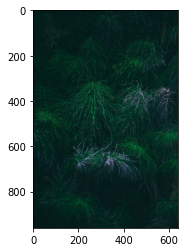

photos/CLACWnwpx24.jpg


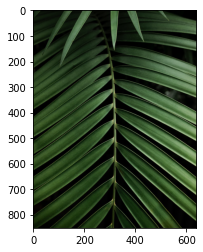

photos/20lx7yFMPdQ.jpg


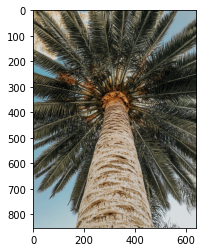

In [ ]:
search('Palme')

## In French

Query:  Palmier
photos/0gNVyfQMRVI.jpg


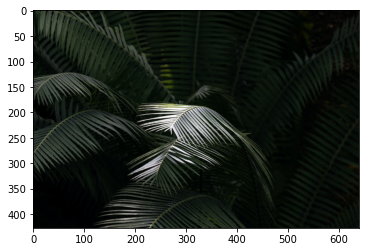

photos/9_uMcDhylKw.jpg


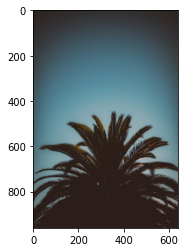

photos/VpmE7AbDg0A.jpg


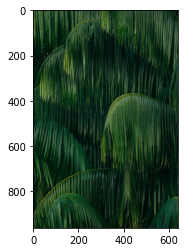

In [13]:
search('Palmier')

Query:  heureuse
photos/SazpfcJNDPQ.jpg


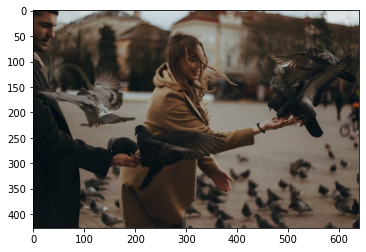

photos/G7qe8gt4T1U.jpg


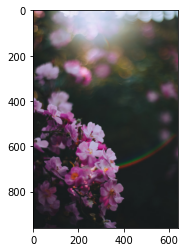

photos/8fYhrgV_IWg.jpg


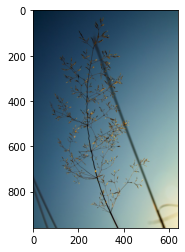

In [15]:
search('heureuse')

## In Spanish

Query:  Fruta
photos/SWfcRVm-o0E.jpg


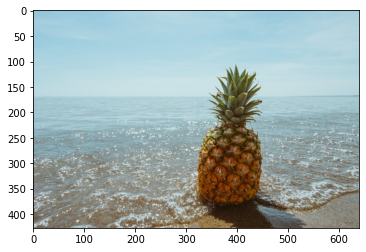

photos/DWGBY2Wuqeo.jpg


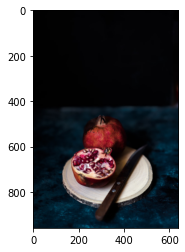

photos/_3-OwU30m3Q.jpg


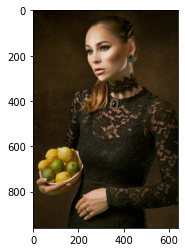

In [17]:
search('Fruta')

Query:  gracias
photos/4UBHkX2rlMY.jpg


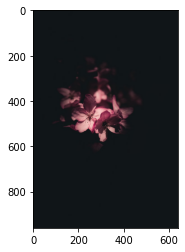

photos/55BTsEcMsBs.jpg


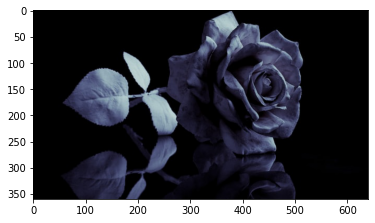

photos/hFVrrAIeFbM.jpg


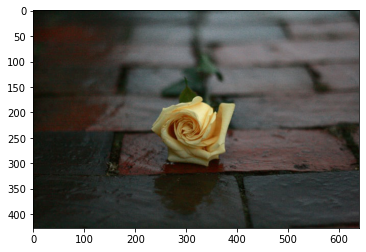

In [18]:
search('gracias')

## In Hindi

Query:  शुक्रिया
photos/4UBHkX2rlMY.jpg


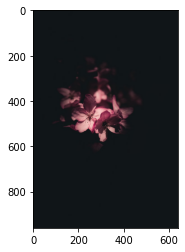

photos/55BTsEcMsBs.jpg


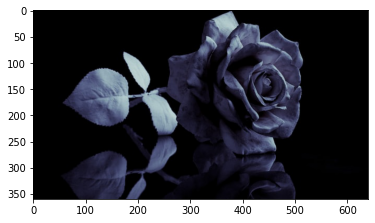

photos/hFVrrAIeFbM.jpg


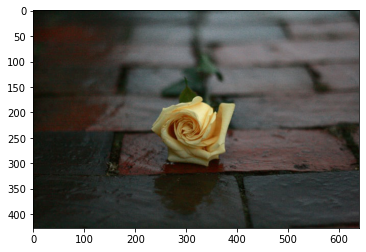

In [19]:
search('शुक्रिया')

Query:  विश्वविद्यालय
photos/iRNGsOeKUU0.jpg


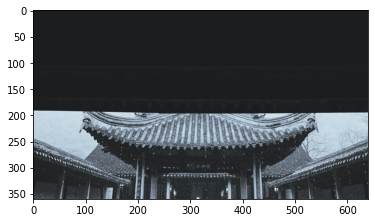

photos/hxb2Xdr3Uhw.jpg


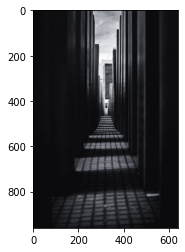

photos/tH8VsaZA5HA.jpg


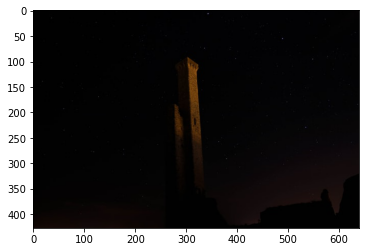

In [20]:
search('विश्वविद्यालय')

Query:  महल
photos/iRNGsOeKUU0.jpg


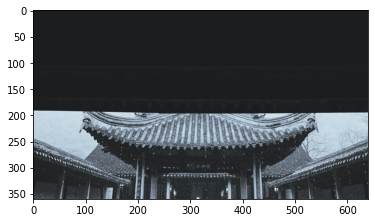

photos/thoPH59eZRU.jpg


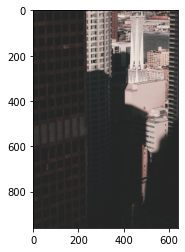

photos/gUmmjvyRswI.jpg


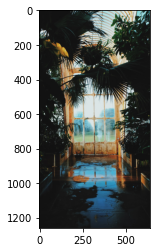

In [21]:
search('महल')